epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9


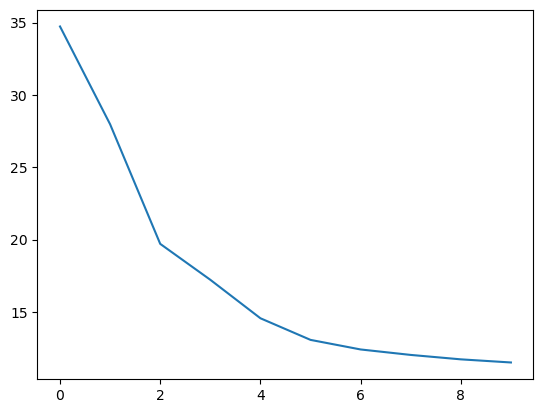

<Figure size 640x480 with 0 Axes>

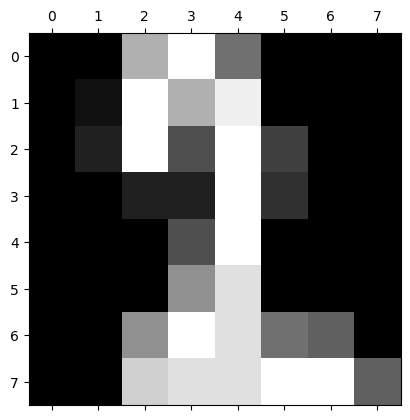

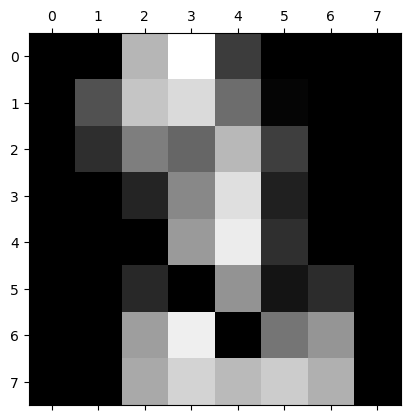

skipping internal nn test


In [1]:
import numpy as np
import nn

import preprocess
import io
import sklearn.datasets
import matplotlib.pyplot as plt


In [2]:
#load datasets
digits = sklearn.datasets.load_digits()

In [47]:

#because both the inputs and outputs are scalar and non-binary gradations 
#carry important information (i.e. a half-shaded pixel is a feature we want to be able
#to reproduce), relu rather than sigmoid was the appropriate activation function.
#this was also true empirically

##lr and batch size were adjusted by trial and error
#epochs was lengthened until the validation loss plateaued

#bce is not numerically stable and doesn't really make sense here
#as many pixels have values of 0 and the true labels don't fall in the range [0,1]
#so mse was used instead

#initialize neural network
test_nn = nn.NeuralNetwork(
    [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'}, {'input_dim': 16, 'output_dim': 16, 'activation': 'relu'}, {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}],
    lr=.00005,
    seed=0,
    batch_size=1,
    epochs=15,
    loss_function="mse" 
    )

#prepare training and validation datasets
n_train = 400
n_val = 100

digit_data = digits.data
np.random.shuffle(digit_data)

train = digit_data[0:n_train]
val = digit_data[n_train:n_train+n_val]

#fit neural network
#x and y are the same since it's an autoencoder
fit = test_nn.fit(train, train, val, val)


epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14


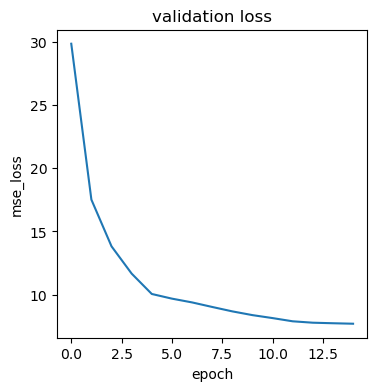

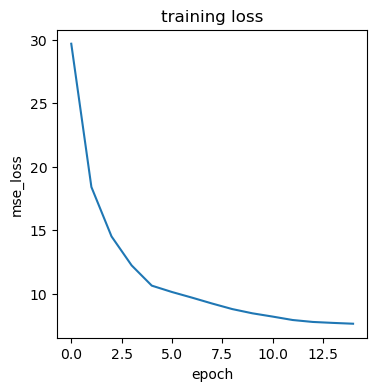

In [56]:
#validation loss
plt.figure(figsize=(4,4))
plt.plot([i for i in range(len(fit[1]))], fit[1])

plt.title("validation loss")
plt.xlabel("epoch")
plt.ylabel("mse_loss")

plt.show()

#training loss
plt.figure(figsize=(4,4))
plt.plot([i for i in range(len(fit[0]))], fit[0])

plt.title("training loss")
plt.xlabel("epoch")
plt.ylabel("mse_loss")

plt.show()


In [57]:
#as an MSE loss was used, the reconstruction error for the validation set is the validation loss at the last epoch

print(f"reconstruction error = {fit[1][-1]}")

reconstruction error = 7.69121947149825


<Figure size 640x480 with 0 Axes>

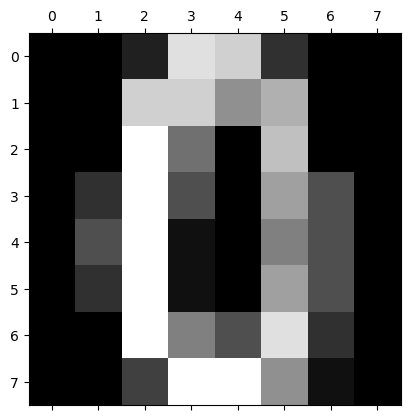

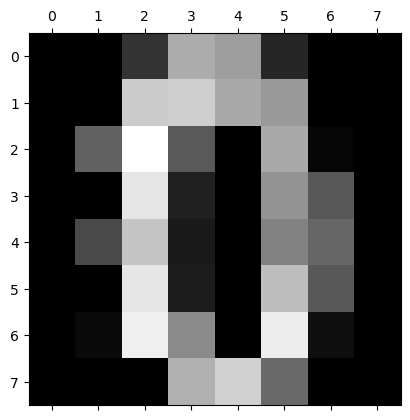

In [58]:
#plot original and reconstructed images for comparison

img_ind = 0
val_mat = np.reshape(val[img_ind], (8,8)) #digits.images[img_ind]
pred_mat = np.reshape(test_nn.predict(val[img_ind]), (8,8))

plt.gray()

plt.matshow(val_mat)
plt.matshow(pred_mat)